In [27]:
import os
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import regex as re
from pathlib import Path


In [28]:
model_lookup_name = "llama-3-70b-chat"
topicgpt_path = Path("../../topicGPT")
folder_path = f'{topicgpt_path}/data/output/{model_lookup_name}'
if not os.path.exists(folder_path):
    print('Files not found')

In [29]:
cont_file= "cont_generation_1_outdomain_seed_topics.jsonl"
gen_file= "generation_1_outdomain_seed_topics.jsonl"
gen_md_file= "generation_1_outdomain_seed_topics.md"


In [30]:
# Fetch all data from the directory
cont_data = pd.read_json(os.path.join(folder_path, cont_file), lines=True)
generation_json_data = pd.read_json(os.path.join(folder_path, gen_file), lines=True)

generation_md_data=[]
with open(os.path.join(folder_path, gen_md_file)) as f:
    for line in f:
        generation_md_data.append(line)




Text(0.5, 1.0, 'Number of Topics Over Documents')

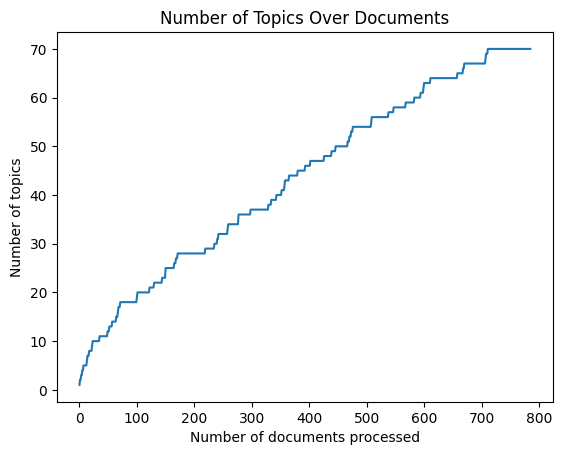

In [31]:
# Plot Number of Topics Over Documents
count_new=[]
count=0
for v in cont_data.topics:
    for topic in v:
        if topic['duplicate']==False:
            count=count+1
    count_new.append(count)
plt.plot(range(len(cont_data)), count_new)
plt.xlabel("Number of documents processed")
plt.ylabel("Number of topics")
plt.title("Number of Topics Over Documents")

In [32]:
resp=[]
for index, row in generation_json_data.iterrows():
    i=row['responses'].split('\n')
    dict_responses={}
    for ind,xml_string in enumerate(i):
        if re.match("Note:", xml_string):
            continue
        if re.match('\[[0-9]*\]',xml_string):
            xml_string=re.sub('\[[0-9]*\] ','',xml_string)
            try:
                # print(xml_string.split(':')[1])
                dict_responses[xml_string.split(':')[0]]=xml_string.split(':')[1].lstrip()

            except:
                # print('no desc found')
                dict_responses[xml_string.split(':')[0]]='NA'
    row['responses']=dict_responses

In [33]:
# generation_json_data.to_json(os.path.join(folder_path, 'generation_1_processed.jsonl'), orient = 'records', index = 'false',lines=True)

In [34]:
arr_count={}
for i,v in enumerate(generation_md_data):
    v=v.split()
    if v==[]:break
    for c,ind in enumerate(v):
        if re.search("Count",ind):
            break
    arr_count[i]=int(v[c+1].replace( "):", ""))
print(arr_count)


{0: 80, 1: 103, 2: 120, 3: 122, 4: 22, 5: 10, 6: 13, 7: 26, 8: 73, 9: 16, 10: 39, 11: 57, 12: 32, 13: 16, 14: 8, 15: 12, 16: 15, 17: 81, 18: 6, 19: 32, 20: 12, 21: 7, 22: 7, 23: 2, 24: 3, 25: 12, 26: 5, 27: 2, 28: 3, 29: 1, 30: 8, 31: 29, 32: 2, 33: 4, 34: 3, 35: 7, 36: 1, 37: 4, 38: 1, 39: 3, 40: 2, 41: 2, 42: 1, 43: 3, 44: 6, 45: 6, 46: 7, 47: 8, 48: 2, 49: 1, 50: 2, 51: 2, 52: 3, 53: 1, 54: 1, 55: 1, 56: 1, 57: 1, 58: 3, 59: 4, 60: 4, 61: 4, 62: 1, 63: 2, 64: 1, 65: 1, 66: 2, 67: 1, 68: 1, 69: 1}


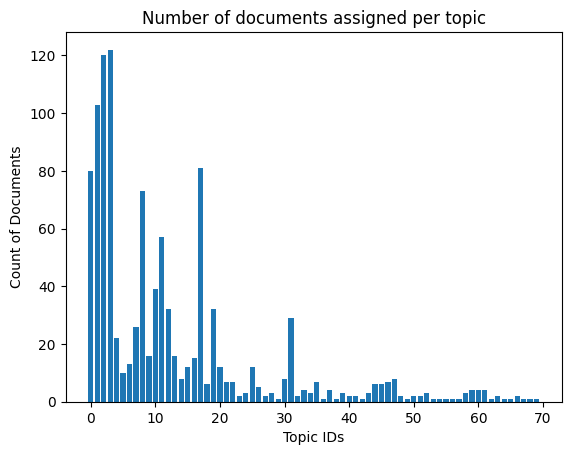

In [35]:
plt.bar(list(arr_count.keys()), list(arr_count.values()))
plt.xlabel("Topic IDs")
plt.ylabel("Count of Documents")
plt.title("Number of documents assigned per topic")
plt.show()


In [36]:
arr_count_sorted= sorted(arr_count.items(), key=lambda x: x[1], reverse=True)
import pprint
pp = pprint.PrettyPrinter(depth=4)
# pp.pprint(arr_count_sorted)

In [37]:
count =0
dict_count={}
for i in arr_count_sorted:
    dict_count[i[1]]=dict_count.get(i[1],0)+1
    if i[1]==2:
        count=count+1
        # print(i)
print(dict_count)

{122: 1, 120: 1, 103: 1, 81: 1, 80: 1, 73: 1, 57: 1, 39: 1, 32: 2, 29: 1, 26: 1, 22: 1, 16: 2, 15: 1, 13: 1, 12: 3, 10: 1, 8: 3, 7: 4, 6: 3, 5: 1, 4: 5, 3: 7, 2: 10, 1: 16}


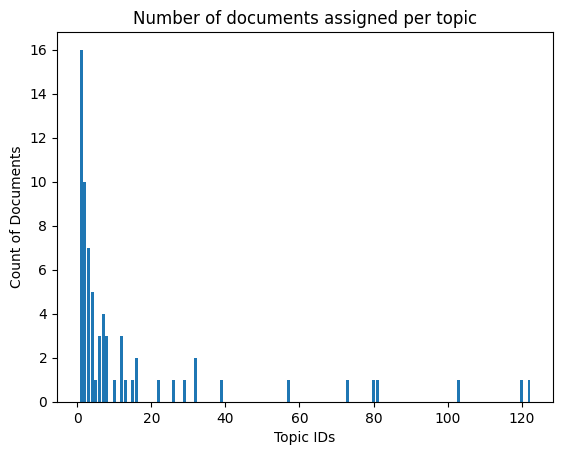

In [38]:
plt.bar(list(dict_count.keys()), list(dict_count.values()))
plt.xlabel("Topic IDs")
plt.ylabel("Count of Documents")
plt.title("Number of documents assigned per topic")
plt.show()



In [39]:
no_doc={}
for i,v in generation_json_data.iterrows():
    no_doc[len(v.responses)]=no_doc.get(len(v.responses),0)+1
print(no_doc)

{1: 523, 2: 240, 3: 22, 4: 1}


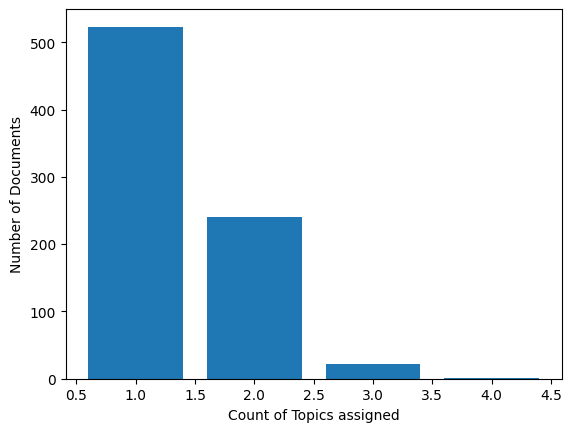

In [40]:
plt.bar(list(no_doc.keys()), list(no_doc.values()))
plt.xlabel("Count of Topics assigned")
plt.ylabel("Number of Documents")
plt.show()